In [1]:
# Import Main Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [23]:
# Load the Dataset from UCI 
# Titanicdata=pd.read_csv(r'C:\MLData\DataSets\Practice_1\titanic.csv.txt')
SalaryData=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=0 )
SalaryData


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Classification   Salary <=50k |  >50K

In [24]:
# lets check the dataset 
SalaryData.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [25]:
SalaryData.shape  # 207 rows ,61 columns 

(32560, 15)

In [26]:
# EDA (Exploratory data analysis (EDA) )
SalaryData.dtypes 
# column R is the type of Object 

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [31]:
data=pd.DataFrame(SalaryData)

data.keys()

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [57]:
# drop the columns
data.drop(['39',' 77516',' 13',' 40',' 0', ' 2174'],axis=1,inplace=True)


In [32]:
# Label Encoding for Object Column Which is <=50K : Y
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:, -1])
data.iloc[:, -1]

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name:  <=50K, Length: 32560, dtype: int32

In [60]:
# find out the null values 
data.isnull().sum()

 State-gov        0
 Bachelors        0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 United-States    0
 <=50K            0
dtype: int64

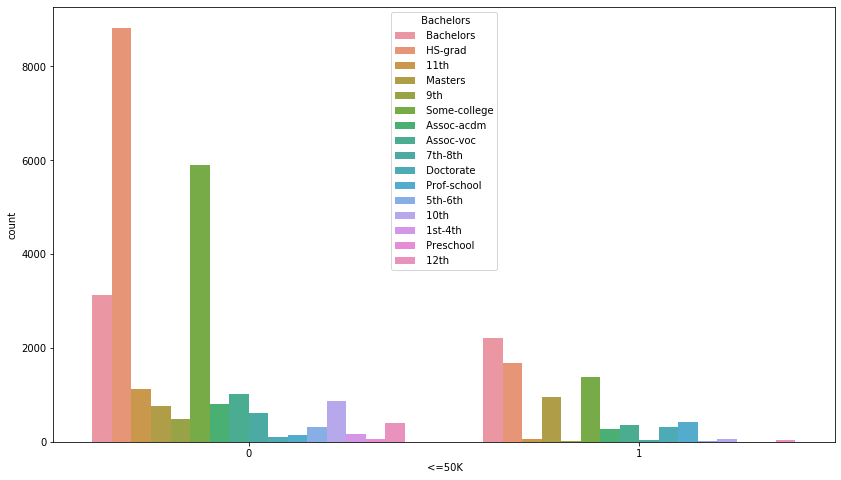

In [61]:
plt.figure(figsize=(14,8))
sns.countplot(hue=" Bachelors",x=' <=50K', data=data)


In [70]:
# Label Encoding for Object Column Male
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:, -3] = labelencoder.fit_transform(data.iloc[:, -3])
data.iloc[:, -3]

0        1
1        1
2        1
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    1
32559    0
Name:  Male, Length: 32560, dtype: int32

In [76]:
# Label Encoding for Object Column Never-married
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:, 2] = labelencoder.fit_transform(data.iloc[:, 2])
data.iloc[:, 2]

0        2
1        0
2        2
3        2
4        2
        ..
32555    2
32556    2
32557    6
32558    4
32559    2
Name:  Never-married, Length: 32560, dtype: int32

In [80]:
# Label Encoding for Object Column State-gov
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:, 0] = labelencoder.fit_transform(data.iloc[:, 0])
data.iloc[:, 0]

0        6
1        4
2        4
3        4
4        4
        ..
32555    4
32556    4
32557    4
32558    4
32559    5
Name:  State-gov, Length: 32560, dtype: int32

In [87]:
# Label Encoding for Object Column White
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,5] = labelencoder.fit_transform(data.iloc[:,5])
data.iloc[:,5]

0        4
1        4
2        2
3        2
4        4
        ..
32555    4
32556    4
32557    4
32558    4
32559    4
Name:  White, Length: 32560, dtype: int32

In [88]:
# Label Encoding for Object Column Not-in-family
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,4] = labelencoder.fit_transform(data.iloc[:,4])
data.iloc[:,4]

0        0
1        1
2        0
3        5
4        5
        ..
32555    5
32556    0
32557    4
32558    3
32559    5
Name:  Not-in-family, Length: 32560, dtype: int32

In [90]:
# Label Encoding for Object Column Not-in-family
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,-2] = labelencoder.fit_transform(data.iloc[:,-2])
data.iloc[:,-2]

0        39
1        39
2        39
3         5
4        39
         ..
32555    39
32556    39
32557    39
32558    39
32559    39
Name:  United-States, Length: 32560, dtype: int32

In [94]:
# Label Encoding for Object Column Bachelors
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,1] = labelencoder.fit_transform(data.iloc[:,1])
data.iloc[:,1]

0         9
1        11
2         1
3         9
4        12
         ..
32555     7
32556    11
32557    11
32558    11
32559    11
Name:  Bachelors, Length: 32560, dtype: int32

In [96]:
# Label Encoding for Object Column Bachelors
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,3] = labelencoder.fit_transform(data.iloc[:,3])
data.iloc[:,3]

0         4
1         6
2         6
3        10
4         4
         ..
32555    13
32556     7
32557     1
32558     1
32559     4
Name:  Adm-clerical, Length: 32560, dtype: int32

In [98]:
data

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0
32556,4,11,2,7,0,4,1,39,1
32557,4,11,6,1,4,4,0,39,0
32558,4,11,4,1,3,4,1,39,0


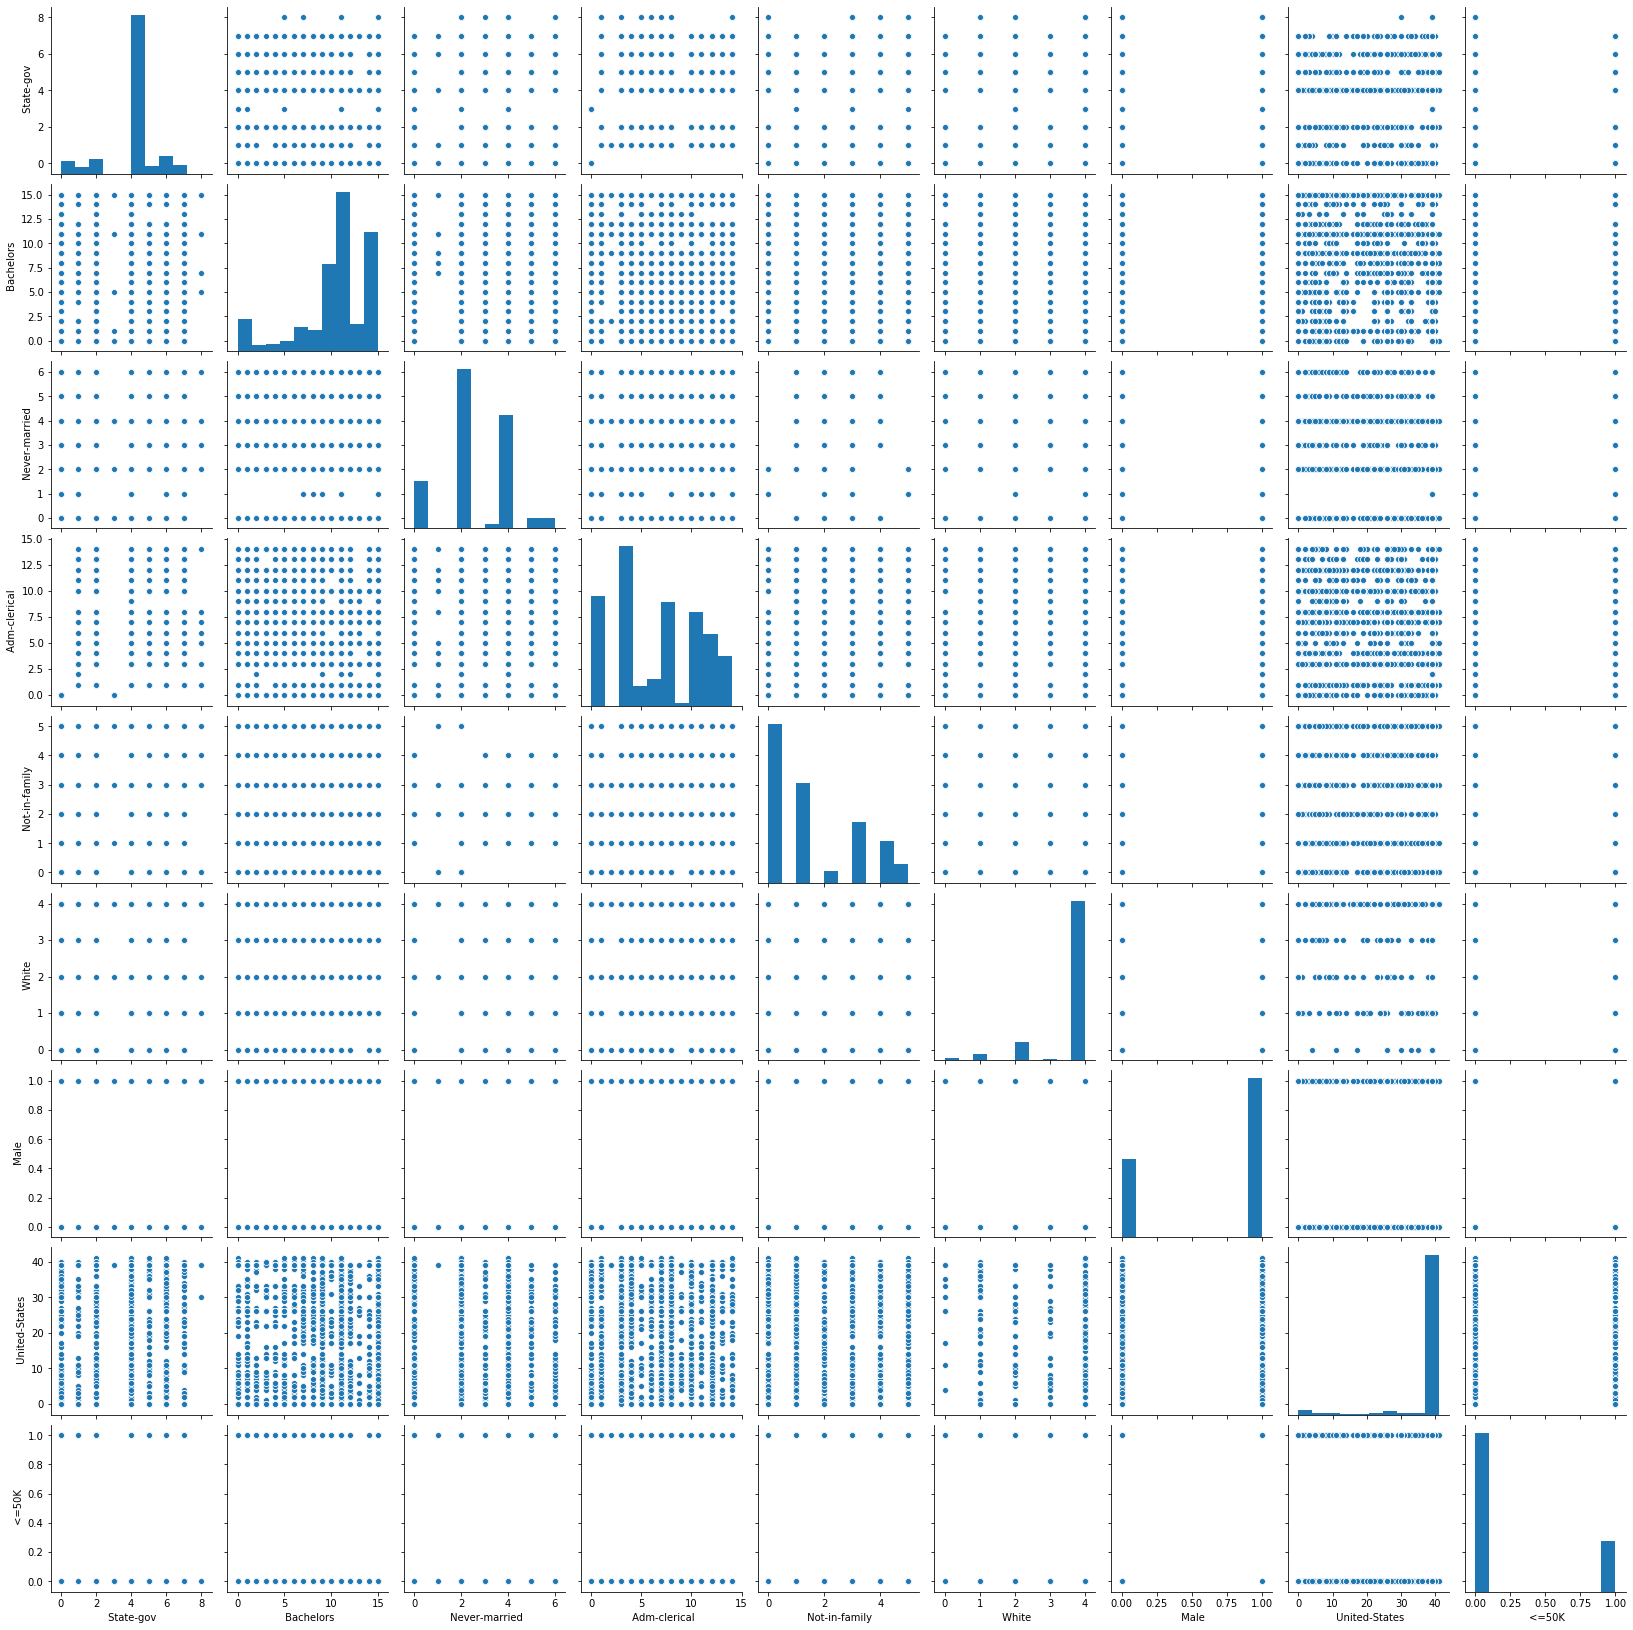

In [100]:
sns.pairplot(data)

In [103]:
# define X,Y  and it's Shape
y=np.array(data[' <=50K'])
y=y.reshape(-1,1)
print(y.shape)



(32560, 1)


In [102]:

# data.drop(' <=50K',axis=1,inplace=True)
x=data
print(data.shape)

(32560, 8)


In [104]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42

In [105]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
# final_r_state=0
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state            
    #print("max r2 score corresponding to",final_r_state," is ",max_r_score)
            return final_r_state# Define Classification Models 


# Define Classification Models 


In [106]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100)


In [107]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("RandomForestClassifier",RFC))

*********** KNeighborsClassifier ************




random state value = 45
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.8217476270240089


Cross_Val_Score= 0.8023957056568701


roc_auc_score= 0.7107717861818517


classification_report
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      5455
           1       0.67      0.50      0.57      1709

   micro avg       0.82      0.82      0.82      7164
   macro avg       0.76      0.71      0.73      7164
weighted avg       0.81      0.82      0.81      7164



[[5035  420]
 [ 857  852]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ************




random state value = 43
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probabi

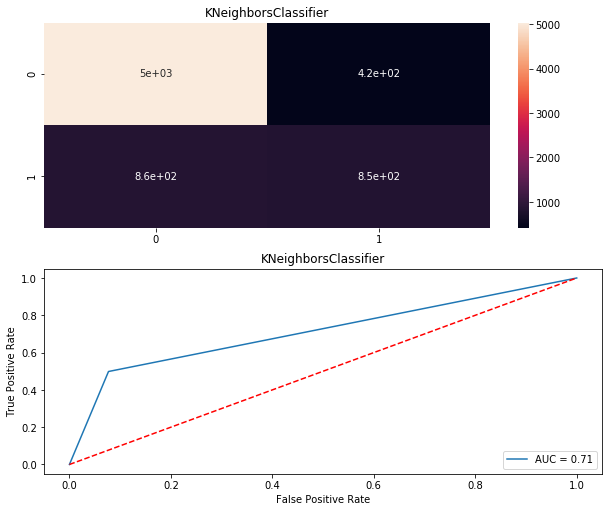

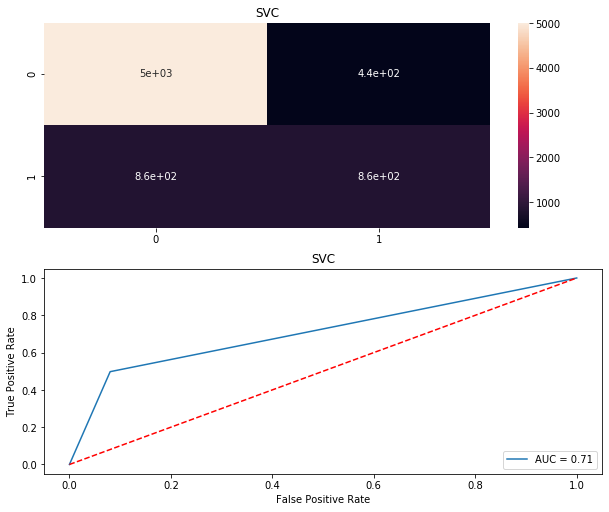

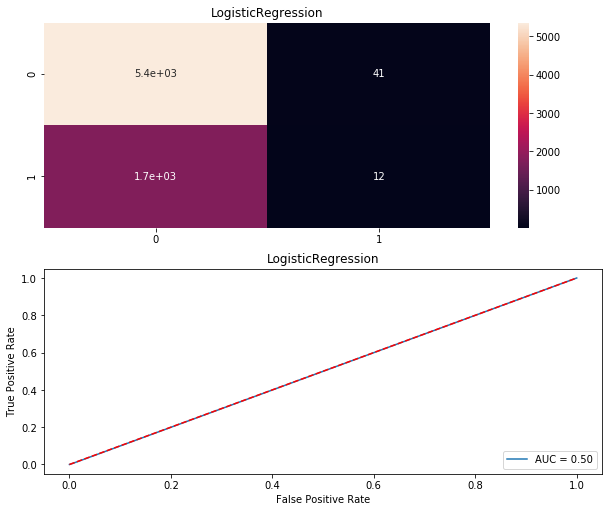

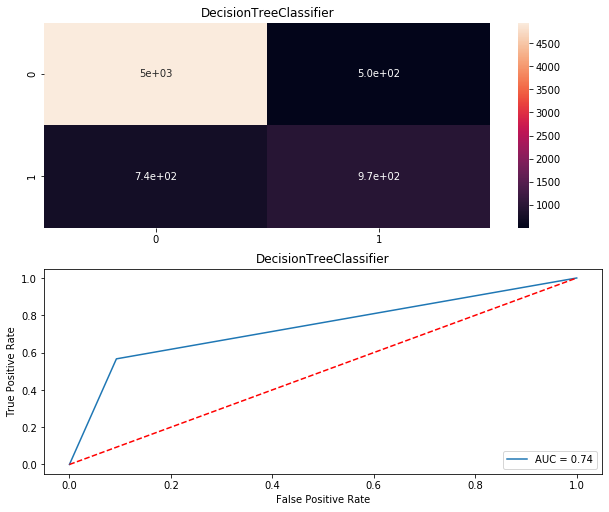

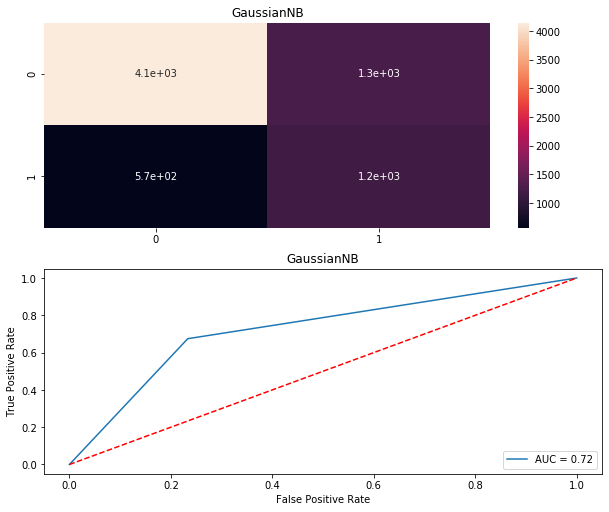

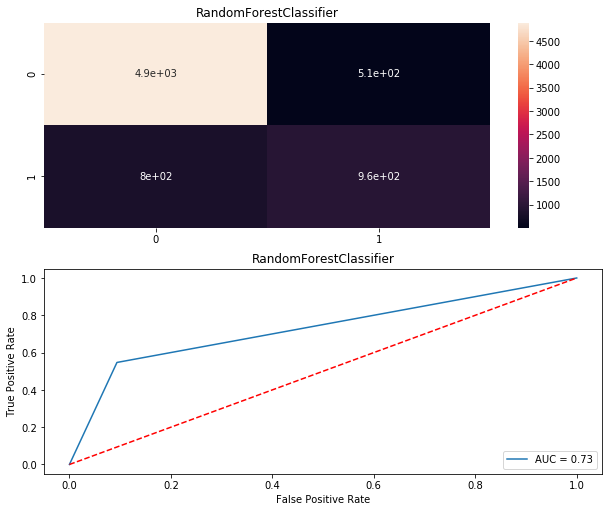

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [111]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs})
result

,Model,Accuracy_score,Cross_val_Score
0,KNeighborsClassifier,82.174763,80.239571
1,SVC,81.839754,82.023970
2,LogisticRegression,75.027917,75.353198
3,DecisionTreeClassifier,82.607482,81.520277
4,GaussianNB,74.413735,74.702084
5,RandomForestClassifier,81.797878,82.413997


In [112]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(DT,'DT_Model')
OuModel=joblib.load('DT_Model')
OuModel.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])